In [1]:
import os
import glob
import random
import shutil
from tempfile import gettempdir
from IPython.display import clear_output, Image
from torchvision.datasets.folder import pil_loader
from model import Net
from utils import pil_to_model_tensor_transform
import consts

# UTKFace constants

MALE = 0
FEMALE = 1

WHITE = 0
BLACK = 1
ASIAN = 2
INDIAN = 3
OTHER = 4

# User constants

dset_path = os.path.join('.', 'data', 'UTKFace', 'unlabeled')
tempdir = gettempdir()

In [2]:
consts.NUM_Z_CHANNELS = 100  # we have two trained models, with 50 and 100
net = Net()
load_path = {100: r"trained_models/100_Z_channels_200th_epoch"}[consts.NUM_Z_CHANNELS]
net.load(load_path, slim=True)  # slim tells the net to load only the encoder and generator

c:\Users\daoud\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\serialization.py:786: SourceChangeWarning: source code of class 'torch.nn.modules.container.ModuleList' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
c:\Users\daoud\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\serialization.py:786: SourceChangeWarning: source code of class 'torch.nn.modules.container.Sequential' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
c:\Users\daoud\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\serialization.py:786: SourceChangeWarning: source code of class 'torch.nn.modules.conv.Conv2d

[22:00] Loaded E, G from trained_models/100_Z_channels_200th_epoch


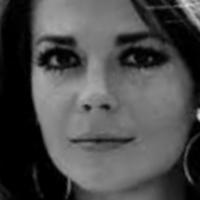

In [4]:
# Game 3: Kids
# Set the attributes of the first random person you want to test
age_1 = 30
gender_1 = FEMALE
race_1 = WHITE

image_path_1 = random.choice(glob.glob(os.path.join(dset_path, '{a}_{g}_{r}*'.format(a=age_1, g=gender_1, r=race_1))))
Image(filename=image_path_1)  # Will select and show a person with the attributes you selected

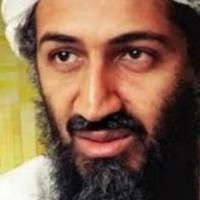

In [6]:
# Game 3: Kids
# Set the attributes of the second random person you want to test
age_2 = 35
gender_2 = MALE
race_2 = BLACK

image_path_2 = random.choice(glob.glob(os.path.join(dset_path, '{a}_{g}_{r}*'.format(a=age_2, g=gender_2, r=race_2))))
Image(filename=image_path_2)  # Will select and show a person with the attributes you selected

c:\Users\daoud\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\utils.py:63: UserWarning: The parameter 'range' is deprecated since 0.12 and will be removed in 0.14. Please use 'value_range' instead.
  warnings.warn(


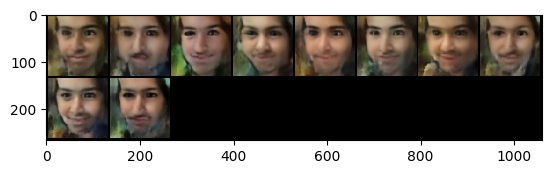

TypeError: save_image() missing 1 required positional argument: 'fp'

In [7]:
image_tensor_1 = pil_to_model_tensor_transform(pil_loader(image_path_1))
image_tensor_2 = pil_to_model_tensor_transform(pil_loader(image_path_2))
Image(filename=net.kids(image_tensors=(image_tensor_1, image_tensor_2), length=10, target=tempdir))